In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_csv('8.1Position Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
dataset.shape

(10, 3)

In [4]:
dataset.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [5]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
# Since Position and level mean the same hence we'll not consider position as a attribute
x= dataset.iloc[:, 1:2].values
y= dataset.iloc[:, -1].values

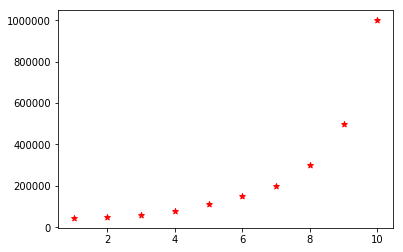

In [7]:
plt.scatter(x, y, color ='r', marker = '*')
plt.show()

In [8]:
# fitting polynomial LR model with degree 5 to the dataset
from sklearn.preprocessing import PolynomialFeatures
pr5 = PolynomialFeatures(degree = 5)
x_poly5 = pr5.fit_transform(x)

In [9]:
from sklearn.linear_model import LinearRegression
lr5 = LinearRegression()
lr5.fit(x_poly5, y)
print(lr5.predict(pr5.fit_transform([[6.5]])))
print(lr5.score(x_poly5, y))  # Training score

[174878.07765118]
0.9997969027099753


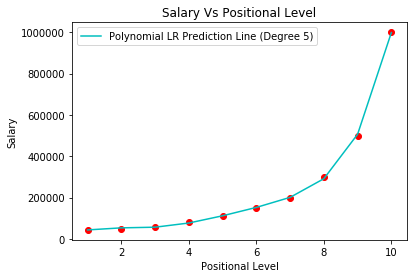

In [10]:
# Visualising the results of polynomial LR with degree=5
plt.scatter(x, y, color='red')
plt.plot(x, lr5.predict(pr5.fit_transform(x)), color='c', label='Polynomial LR Prediction Line (Degree 5)')
plt.title('Salary Vs Positional Level')
plt.xlabel('Positional Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

Hence as degree of polynomial equation increases accuracy of model increases. But problem of Overfitting in the model has started  after degree=4.

Now, since we know that,
<img src= './Image/8.1 Image f.jpeg' width=40% height=40%/>
- **Noise** is a distortion in data, that is unwanted by the perceiver of data. We can't control noise in the data. hence will always contribute to the error.

- **Bias** is inability of a machine learning method(algorithm) to capture the true relationship between input and output.

- **Variance** is the difference in fit of a machine learning algorithm between different datasets.

## Bias:
Let us understand various cases under bias,
Since fitness of a curve to training dataset is calculated by **Sum of Squared Error(SSE)** i.e, square of distance of each data point from fit line and add them up.

### **Bias in low complexity Model:**
<img src= './Image/8.1 Image g.jpeg' width=70% height=60%/>

- Here since the model complexity is low hence algorithm line curve has not fitted well to the training dataset (**Underfitting**) which causes high error. Hence low complexity model has high bias.



### **Bias in high complexity Model:**
<img src= './Image/8.1 Image h.jpg' width=70% height=50%/>

- Here since the model complexity is high hence algorithm line curve fitted in such a way that it passes through all training dataset (**Overfitting**) which causes minimum(zero) error. Hence high complexity model has low bias.

## Variance:
Let us understand various cases under variance,


### **Variance in low complexity Model:**
<img src= './Image/8.1 Image i.jpeg' width=70% height=60%/>

- Here since fitness of algorithm line curve to training and testing dataset is approximately similar. Hence low complexity model have low variance(variability).

### **Variance in high complexity Model:**
<img src= './Image/8.1 Image j.jpeg' width=70% height=60%/>

- Here since fitness of algorithm line curve to testing dataset is terrible. Hence high complexity have high variance(variability).


## Summary:
- Low complexity model has high bias and low variance.
- High complexity model has low bias and high variance.
- **Ideal algorithm fitted line curve** must have low bias i.e, can model true relationship between feature and target and also have low variance i.e, produce consistent prediction across different datasets. This is called **Bias- Variance Trade off**.
<img src= './Image/8.1 Image k.jpeg' width=70% height=60%/>

### Regularization:
- Regularization is a technique to reduce the complexity of the model. It does this by penalizing the loss function. This helps to solve the overfitting problem.
- It adds a regularization term in order to prevent the coefficients to fit so perfectly to overfit. 

### Regularization Term: L1 and L2:
- L2 is the **sum of the square of the weights**, while L1 is just the **absolute sum of the weights**.

### Let's understand what is penalizing the loss function?
Loss function(Cost function) is the sum of squared difference between the actual value and the predicted value
<img src='./Image/8.1 Image a.PNG' height='50%' width='50%'/>
- As the degree of the input features increases the model becomes complex and tries to fit all the 
data points as seen above.
- Regularization works on assumption that smaller weights generate simpler model and thus helps avoid overfitting.
- We penalize all the weights by making them small. This also makes the model simpler and less prone to overfitting.
<img src='./Image/8.1 Image b.PNG' width='50%' height='50%'/>
- We have added the regularization term to the sum of squared differences between the actual value and predicted value. Regularization term keeps the weights small making the model simpler and avoiding overfitting.
- Here λ is the penalty term or regularization parameter which determines how much to penalizes the weights.
- When λ is zero then the regularization term becomes zero. We are back to the original Loss function.
<img src='./Image/8.1 Image c.PNG' width='40%' height='40%'/>
- When λ is large, we penalizes the weights and they become close to zero. This results is a very simple model having a high bias or is underfitting.

### L1 regularization is also referred as L1 norm or Lasso:
- In L1, we shrink the parameters to zero. 
- L1 regularization does feature selection. It does this by assigning insignificant input features with zero weight and useful features with a non zero weight.
- In L1 regularization we penalize the summation of absolute value of the weights.
<img src='./Image/8.1 Image d.PNG' width='40%' height='40%'/>

### L2 Regularization or Ridge Regularization:
- In L2 regularization, regularization term is the sum of square of all feature weights
- L2 regularization forces the weights to be small but does not make them zero and does non sparse solution.
<img src='./Image/8.1 Image e.PNG' width='40%' height='40%'/>
- The influence of regularization term is controlled by the λ parameter.
- Higher λ means more regularization and simpler model.
- The main idea behind Ridge regression is to find a new line that doesn't fit the training data as well...

In [11]:
from sklearn.linear_model import Ridge, Lasso
rr = Ridge(alpha=1.0, random_state=0)
rr.fit(x_poly5, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)

In [12]:
print(rr.score(x_poly5, y))
print(rr.predict(pr5.fit_transform([[6.5]])))

0.9992742443987246
[167390.95644778]


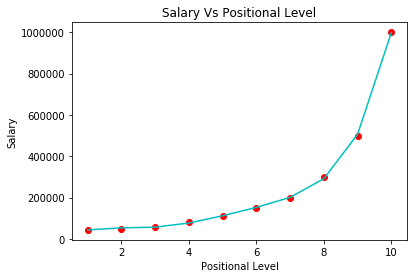

Training score for alpha = 0 is 0.9997969027099753
Prediction of salary = [174878.07765131]


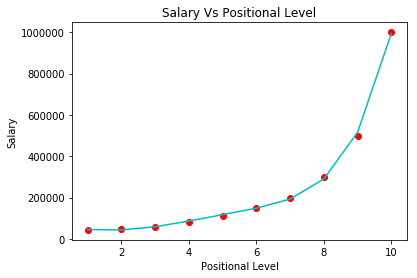

Training score for alpha = 1 is 0.9992742443987246
Prediction of salary = [167390.95644778]


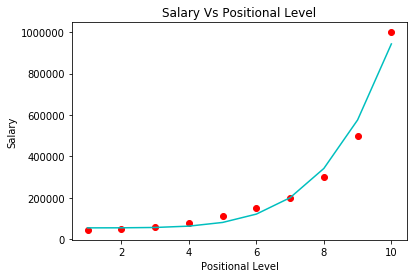

Training score for alpha = 10000000.0 is 0.9840807006338704
Prediction of salary = [154843.28103359]


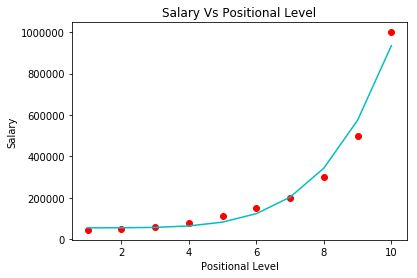

Training score for alpha = 100000000.0 is 0.9831825496223505
Prediction of salary = [157338.08038714]


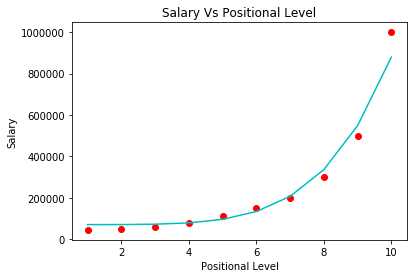

Training score for alpha = 1000000000.0 is 0.9752636540399745
Prediction of salary = [164950.51290436]


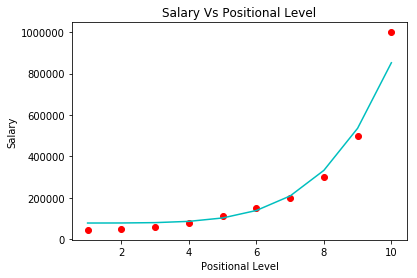

Training score for alpha = 1500000000.0 is 0.9668578631023931
Prediction of salary = [168587.85988782]


In [19]:
for i in [0, 1, 10000000.0, 100000000.0, 1000000000.0, 1500000000.0]:
    rr = Ridge(alpha=i, random_state=0)
    rr.fit(x_poly5, y)
    plt.scatter(x, y, color='red')
    plt.plot(x, rr.predict(pr5.fit_transform(x)), color='c')
    plt.title('Salary Vs Positional Level')
    plt.xlabel('Positional Level')
    plt.ylabel('Salary')
    plt.show()
    print(f'Training score for alpha = {i} is {rr.score(x_poly5, y)}')
    print(f'Prediction of salary = {rr.predict(pr5.fit_transform([[6.5]]))}')

In [14]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=10000000.0, random_state=0)
ls.fit(x_poly5, y)

Lasso(alpha=10000000.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
print(ls.score(x_poly5, y))
print(ls.predict(pr5.fit_transform([[6.5]])))

0.983315201103578
[156450.02967365]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


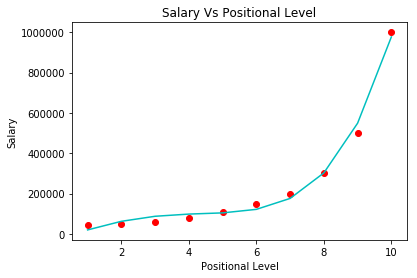

Training score for alpha = 0 is 0.9922627578035996
Prediction of salary = [141911.39641486]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


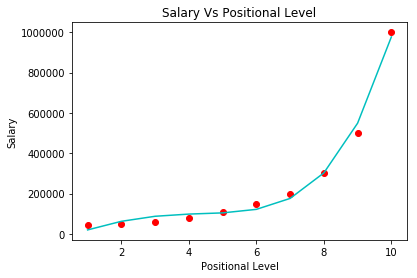

Training score for alpha = 1 is 0.992263467969656
Prediction of salary = [141912.1602049]


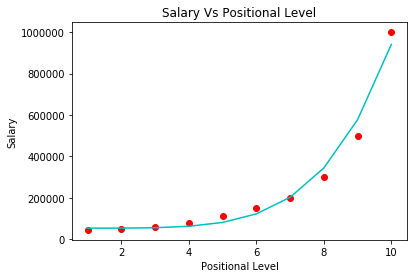

Training score for alpha = 10000000.0 is 0.983315201103578
Prediction of salary = [156450.02967365]


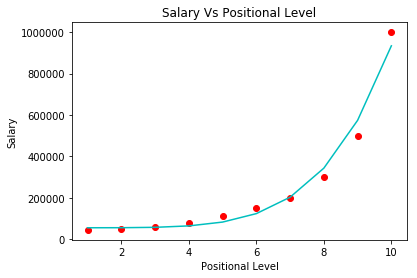

Training score for alpha = 100000000.0 is 0.9831929314161407
Prediction of salary = [157389.62510438]


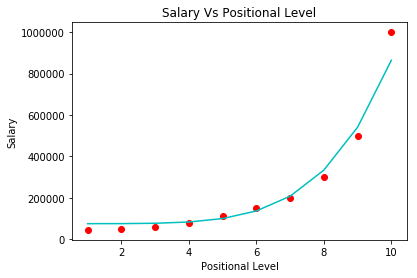

Training score for alpha = 1000000000.0 is 0.970965962672432
Prediction of salary = [166785.57941169]


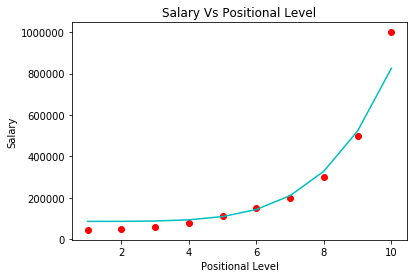

Training score for alpha = 1500000000.0 is 0.9555278708243146
Prediction of salary = [172005.55402686]


In [20]:
for i in [0, 1, 10000000.0, 100000000.0, 1000000000.0, 1500000000.0]:
    ls = Lasso(alpha=i, random_state=0)
    ls.fit(x_poly5, y)
    plt.scatter(x, y, color='red')
    plt.plot(x, ls.predict(pr5.fit_transform(x)), color='c')
    plt.title('Salary Vs Positional Level')
    plt.xlabel('Positional Level')
    plt.ylabel('Salary')
    plt.show()
    print(f'Training score for alpha = {i} is {ls.score(x_poly5, y)}')
    print(f'Prediction of salary = {ls.predict(pr5.fit_transform([[6.5]]))}')

### Important points to remember while applying Ridge and Lasso:
- Lasso can set some coefficients to zero, thus performing feature selection, while ridge regression cannot.
- Both methods allow to use correlated predictors, but they solve multicollinearity issue differently:
  - In ridge regression, the coefficients of correlated predictors are similar.
  - In lasso, one of the correlated predictors has a larger coefficient, while the rest are (nearly) zeroed.
- Lasso tends to do well if there are a small number of significant parameters and the others are close to zero (i.e, when only a few predictors actually influence the response).
- Ridge works well if there are many large parameters of about the same value (i.e, when most predictors impact the response).

**Summary:** Lasso regression can lead to feature selection whereas Ridge can only shrink coefficients close to zero.